<a href="https://colab.research.google.com/github/Asuskf/AI6-UIO_ReinforcementLearning/blob/development/session_3/AI6_RL_Cadena_Markov_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cadenas de Markov 

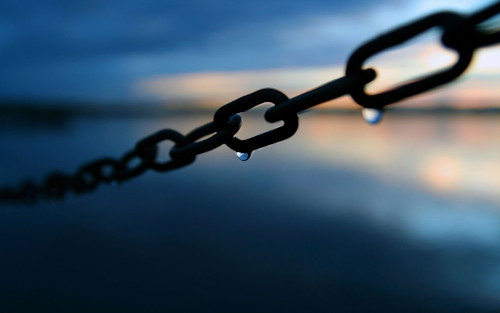

Una cadena de Markov es un proceso aleatorio o, a menudo, llamado estocástico que pasa de un estado a otro de acuerdo con ciertas reglas probabilísticas. Este conjunto de transición satisface la [propiedad de Markov](https://es.wikipedia.org/wiki/Proceso_de_M%C3%A1rkov) (fenómeno aleatorio dependiente del tiempo). Una cadena de Markov tiene un espacio de estado discreto (conjunto de posibles valores de las variables aleatorias) o un conjunto de índices discretos (que a menudo representa el tiempo).


Este conjunto o conjuntos establecen que la **probabilidad de transición a cualquier estado en particular depende únicamente del estado actual y del tiempo transcurrido, y no de la secuencia de estado que lo precedió**. 

## Cadena de Markov de tiempo discreto
Una cadena de Markov de tiempo discreto implica un sistema que se encuentra en un cierto estado en cada paso, y el estado cambia aleatoriamente entre los pasos. Los pasos a menudo se consideran momentos en el tiempo (pero también podría referirse a la distancia física o cualquier otra medida discreta).

Una cadena de Markov en tiempo discreto es una secuencia de variables aleatorias $x_{1}, x_{2}, x_{3},...$ con la propiedad de Markov, de modo que la probabilidad de pasar al siguiente estado depende solo del estado actual y no de los estados anteriores. 

$$Pr(X_{n+1} = x | X_{1} = x_{1}, X_{2} = x_{2}, ..., X_{n})$$
$$Pr(X_{n+1} = x | X_{n} = x_{n})$$

El conocimiento del estado anterior es todo lo que se necesita para determinar la distribución de probabilidad del estado actual, cumpliendo la regla de independencia condicional (**sólo necesitas conocer el estado actual para determinar el siguiente estado**).


## Modelo cadena de Markov (autómata probabilístico)

Los cambios de estado del sistema se denominan **transiciones**. Las probabilidades asociadas con varios cambios de estado se denominan probabilidades de **transición**. Un autómata probabilístico incluye la probabilidad de una transición dada a la función de transición, convirtiéndola en una matriz de transición.

## Ejemplo



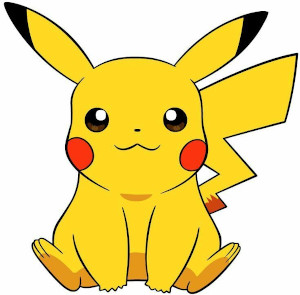

Cuando pikachu está triste: sale a correr **O** toma un helado **O** se echa una siesta.

## Datos históricos

*   Cuando pikachu pasa durmiendo un día triste. Al día siguiente, hay un 60% de probabilidades de que salga a correr, un 20% de que se quede en la cama y un 20% de probabilidades de que coma helado.

*   Cuando pikachu está triste y sale a correr, hay un 60% de posibilidades de que salga a correr al día siguiente, un 30% de que se atiborre de helado y solo un 10% de posibilidades de que pase durmiendo al día siguiente.

*   Cuando pikachu toma un helado en un día triste, hay solo un 10% de posibilidades de que continúe tomando helado al día siguiente, un 70% de que salga a correr y un 20% de posibilidades de que pase durmiendo el próximo día. 

## Representación gráfica de los datos historicos


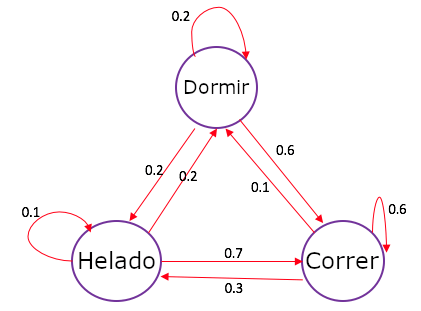

La cadena de Markov representada en el diagrama de estados tiene 3 estados posibles: dormir, correr, helado. Entonces, la matriz de transición será **una matriz de 3 x 3**. Observe que las flechas que salen de un estado siempre suman exactamente 1; de manera similar, las entradas en cada fila de la matriz de transición deben sumar exactamente 1, lo que representa la distribución de probabilidad. En la matriz de transición, las celdas hacen el mismo trabajo que las flechas en el diagrama de estado.

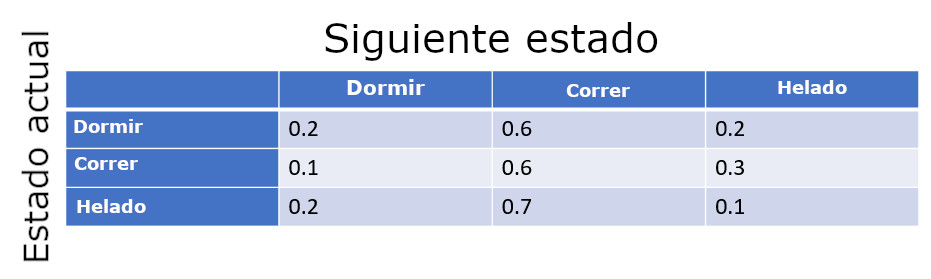

## Ejemplo teórico 

Resolvamos esto: para pasar del estado **dormir** al estado **correr**, pikachu debe:

*   Permanecer en estado: dormir el primer movimiento (o día), luego pasar al segundo movimiento (0.2 ⋅0,6).

*   Se puede mover al estado: corra el primer día y luego permanezca allí el segundo (0.6⋅ 0.6) 

*   O podría pasar al estado: helado en el primer movimiento luego al estado: correr en el segundo (0.2 ⋅0,7). 

Entonces la probabilidad: $((0.2⋅ 0,6) + (0,6 ⋅ 0,6) + (0,2 ⋅0,7)) = 0,62$. 

Entonces, ahora podemos decir que hay un **$62\%$** de probabilidad de que pikachu se mueva al estado: correr después de dos días de estar triste, si comenzó en el estado: **dormir**.


# Scrypt python

In [2]:
import numpy as np
import random as rm

Definamos ahora los estados y su probabilidad: la matriz de transición. Recuerde, la matriz será una matriz de 3 X 3 ya que tiene tres estados. Además, tendrá que definir las rutas de transición, también puede hacerlo utilizando matrices.

In [65]:
# Estados
estados = ["Dormir","Helado","Correr"]

# Possible sequences of events
nombreTransicion = [["DD","DC","DH"],["CD","CC","CH"],["HD","HC","HH"]]

# Matriz de probabilidades (matriz de transición)
matrizTransicion = [[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]]

In [66]:
if sum(matrizTransicion[0])+sum(matrizTransicion[1])+sum(matrizTransicion[1]) != 3:
    print("En algún lugar, algo salió mal. ¿Matriz de transición, quizás?")
else: print("¡¡Todo va a estar bien, deberías seguir adelante !! ;)")

¡¡Todo va a estar bien, deberías seguir adelante !! ;)


In [67]:
# Una función que implementa el modelo de Markov para pronosticar el estado / estado de ánimo.
def prevision_actividad(dias):
    # Elija el estado inicial
    actividadHoy = "Dormir"
    print("Estado de inicio: " + actividadHoy)
    # Almacenará la secuencia de estados tomados. Entonces, esto solo tiene el estado inicial por ahora.
    listaActividades = [actividadHoy]
    i = 0
    # calcular la probabilidad de la lista de Actividades
    prob = 1
    while i != dias:
        if actividadHoy == "Dormir":
            transicion = np.random.choice(nombreTransicion[0],replace=True,p=matrizTransicion[0])
            if transicion == "DD":
                prob = prob * 0.2
                listaActividades.append("Dormir")
                pass
            elif transicion == "DC":
                prob = prob * 0.6
                actividadHoy = "Correr"
                listaActividades.append("Correr")
            else:
                prob = prob * 0.2
                actividadHoy = "Helado"
                listaActividades.append("Helado")
        elif actividadHoy == "Correr":
            transicion = np.random.choice(nombreTransicion[1],replace=True,p=matrizTransicion[1])
            if transicion == "CC":
                prob = prob * 0.5
                listaActividades.append("Correr")
                pass
            elif transicion == "CD":
                prob = prob * 0.2
                actividadHoy = "Dormir"
                listaActividades.append("Dormir")
            else:
                prob = prob * 0.3
                actividadHoy = "Helado"
                listaActividades.append("Helado")
        elif actividadHoy == "Helado":
            transicion = np.random.choice(nombreTransicion[2],replace=True,p=matrizTransicion[2])
            if transicion == "HH":
                prob = prob * 0.1
                listaActividades.append("Helado")
                pass
            elif transicion == "HD":
                prob = prob * 0.2
                actividadHoy = "Dormir"
                listaActividades.append("Dormir")
            else:
                prob = prob * 0.7
                actividadHoy = "Correr"
                listaActividades.append("Correr")
        i += 1  
    print("Posible estado: " + str(listaActividades))
    print("Estado final después "+ str(dias) + " dias: " + actividadHoy)
    print("Probabilidad de la posible secuencia de estados: " + str(prob * 100) + '%')

# Función que pronostica el estado posible para los próximos 2 días
prevision_actividad(2)

Estado de inicio: Dormir
Posible estado: ['Dormir', 'Correr', 'Helado']
Estado final después 2 dias: Helado
Probabilidad de la posible secuencia de estados: 18.0%


In [70]:
def prevision_actividad(dias):
    # Elija el estado inicial
    actividadHoy = "Dormir"
    listaActividades = [actividadHoy]
    i = 0
    prob = 1
    while i != dias:
        if actividadHoy == "Dormir":
            transicion = np.random.choice(nombreTransicion[0],replace=True,p=matrizTransicion[0])
            if transicion == "DD":
                prob = prob * 0.2
                listaActividades.append("Dormir")
                pass
            elif transicion == "DC":
                prob = prob * 0.6
                actividadHoy = "Correr"
                listaActividades.append("Correr")
            else:
                prob = prob * 0.2
                actividadHoy = "Helado"
                listaActividades.append("Helado")
        elif actividadHoy == "Correr":
            transicion = np.random.choice(nombreTransicion[1],replace=True,p=matrizTransicion[1])
            if transicion == "CC":
                prob = prob * 0.5
                listaActividades.append("Correr")
                pass
            elif transicion == "CD":
                prob = prob * 0.2
                actividadHoy = "Dormir"
                listaActividades.append("Dormir")
            else:
                prob = prob * 0.3
                actividadHoy = "Helado"
                listaActividades.append("Helado")
        elif actividadHoy == "Helado":
            transicion = np.random.choice(nombreTransicion[2],replace=True,p=matrizTransicion[2])
            if transicion == "HH":
                prob = prob * 0.1
                listaActividades.append("Helado")
                pass
            elif transicion == "HD":
                prob = prob * 0.2
                actividadHoy = "Dormir"
                listaActividades.append("Dormir")
            else:
                prob = prob * 0.7
                actividadHoy = "Correr"
                listaActividades.append("Correr")
        i += 1    
    return listaActividades

# Para guardar todas las listas de actividades
listaActividad = []
contador = 0

# `Rango` comienza desde el 0 al 10000 pero excluye el último contador
for iteraciones in range(1,10000):
        listaActividad.append(prevision_actividad(2))

# Echa un vistazo a todas los elementos de la `listaActividades` que recopilamos    
#print(listaActividad)

# Repita la lista para obtener un contador de todas las actividades que terminan en el estado: 'Correr'
for listaCorta in listaActividad:
    if(listaCorta[2] == "Correr"):
        contador += 1

# Calculate the probability of starting from state:'Dormir' and ending at state:'Correr'
porcentaje = (contador/10000) * 100
print("La probabilidad de comenzar en el estado: 'Dormir' y terminar en el estado: 'Correr' = " + str(porcentaje) + "%")

La probabilidad de comenzar en el estado: 'Dormir' y terminar en el estado: 'Correr' = 62.64999999999999%


# Fuentes
*   https://es.wikipedia.org/wiki/Proceso_de_M%C3%A1rkov
*   https://www.datacamp.com/community/tutorials/markov-chains-python-tutorial
*   https://webs.ucm.es/info/pslogica/automatas.pdf?fbclid=IwAR3nKqAzpRcVb5jxnOEwik4HWWiBcppTbvUGmuplYrJFh-G2daACvQ5zGuw



